In [2]:
#import dependencies
import os
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt


In [3]:
#Load csv file
#csv file was modified in Excel by removing unnecesary columns
housing = ("Resources/Housing Rossie.csv")

housing_df = pd.read_csv(housing)
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long
0,7229300521,231300.0,2,1.00,1180,5650,1.0,0,0,1955,0,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,1951,1991,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,1933,0,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,1965,0,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,1987,0,98074,47.6168,-122.045


In [4]:
# check for nulls/NAN
print(housing_df.isnull().sum())

id              0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
dtype: int64


In [5]:
# Check for duplicates in the DataFrame based on all columns
duplicates = housing_df.duplicated(keep=False)

# Check if any duplicates exist
if duplicates.any():
    # Filter the DataFrame to show rows with duplicates
    duplicate_rows = housing_df[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows)
    
    # Drop duplicates and overwrite the DataFrame
    housing_df = housing_df.drop_duplicates()
else:
    print("No duplicates found.")

# Display the DataFrame without duplicates
housing_df.head()

Duplicate rows:
               id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
3950   1825069031  550000.0         4       1.75         2410      8447   
3951   1825069031  550000.0         4       1.75         2410      8447   
14982  6308000010  585000.0         3       2.50         2290      5089   
14983  6308000010  585000.0         3       2.50         2290      5089   
20053  8648900110  555000.0         3       2.50         1940      3211   
20054  8648900110  555000.0         3       2.50         1940      3211   

       floors  waterfront  view  yr_built  yr_renovated  zipcode      lat  \
3950      2.0           0     3      1936          1980    98074  47.6499   
3951      2.0           0     3      1936          1980    98074  47.6499   
14982     2.0           0     0      2001             0    98006  47.5443   
14983     2.0           0     0      2001             0    98006  47.5443   
20053     2.0           0     0      2009             0    98027  47.5644

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long
0,7229300521,231300.0,2,1.00,1180,5650,1.0,0,0,1955,0,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,1951,1991,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,1933,0,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,1965,0,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,1987,0,98074,47.6168,-122.045


In [6]:
# Rounding up decimal numbers to the nearest whole number 
# for consistency and clarity for columns that need it.

housing_df.loc[:,'bathrooms'] = housing_df['bathrooms'].round()
housing_df.loc[:,'floors'] = housing_df['floors'].round()

housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long
0,7229300521,231300.0,2,1.0,1180,5650,1.0,0,0,1955,0,98178,47.5112,-122.257
1,6414100192,538000.0,3,2.0,2570,7242,2.0,0,0,1951,1991,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.0,770,10000,1.0,0,0,1933,0,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.0,1960,5000,1.0,0,0,1965,0,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,1987,0,98074,47.6168,-122.045


In [7]:
# Define the threshold year (30 years ago from 2015)
threshold_year = 2015 - 30

# Identify the indices of the rows where the year built is older than the threshold
indices_to_drop = housing_df[housing_df['yr_built'] < threshold_year].index
indices_to_drop

# Drop the rows with the identified indices
housing_df = housing_df.drop(index=indices_to_drop)

housing_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,1987,0,98074,47.6168,-122.045
5,7237550310,1225000.0,4,4.0,5420,101930,1.0,0,0,2001,0,98053,47.6561,-122.005
6,1321400060,257500.0,3,2.0,1715,6819,2.0,0,0,1995,0,98003,47.3097,-122.327
9,3793500160,323000.0,3,2.0,1890,6560,2.0,0,0,2003,0,98038,47.3684,-122.031
16,1875500060,395000.0,3,2.0,1890,14040,2.0,0,0,1994,0,98019,47.7277,-121.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.0,1530,1131,3.0,0,0,2009,0,98103,47.6993,-122.346
21609,6600060120,400000.0,4,2.0,2310,5813,2.0,0,0,2014,0,98146,47.5107,-122.362
21610,1523300141,402101.0,2,1.0,1020,1350,2.0,0,0,2009,0,98144,47.5944,-122.299
21611,291310100,400000.0,3,2.0,1600,2388,2.0,0,0,2004,0,98027,47.5345,-122.069


In [8]:
# Categorize yr_renovated

def categorize_renovation(yr_renovated):
    if yr_renovated == 0:
        return 'Never Renovated'
    elif yr_renovated < 2000:
        return 'Renovated before 2000'
    elif yr_renovated < 2010:
        return 'Renovated 2000-2010'
    else:
        return 'Renovated 2010-2015'

housing_df.loc[:,'renovation_category'] = housing_df['yr_renovated'].apply(categorize_renovation)
housing_df.head()

# # Drop the original 'yr_renovated' column
# df.drop(columns=['yr_renovated'], inplace=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long,renovation_category
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,1987,0,98074,47.6168,-122.045,Never Renovated
5,7237550310,1225000.0,4,4.0,5420,101930,1.0,0,0,2001,0,98053,47.6561,-122.005,Never Renovated
6,1321400060,257500.0,3,2.0,1715,6819,2.0,0,0,1995,0,98003,47.3097,-122.327,Never Renovated
9,3793500160,323000.0,3,2.0,1890,6560,2.0,0,0,2003,0,98038,47.3684,-122.031,Never Renovated
16,1875500060,395000.0,3,2.0,1890,14040,2.0,0,0,1994,0,98019,47.7277,-121.962,Never Renovated


# Univariate analysis

In [9]:
# stat summary for all columns
summary_stats_all = housing_df.describe()

display(summary_stats_all)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long
count,8.292000e+03,8.292000e+03,8292.000000,8292.000000,8292.000000,8.292000e+03,8292.000000,8292.000000,8292.000000,8292.000000,8292.000000,8292.000000,8292.000000,8292.000000
mean,4.678251e+09,5.963475e+05,3.481187,2.397130,2446.813073,1.694734e+04,1.939098,0.005065,0.189822,2000.392668,3.868066,98063.190907,47.541343,-122.155945
std,2.925225e+09,4.033677e+05,0.814036,0.743504,992.724085,4.950895e+04,0.453114,0.070993,0.701259,8.621201,87.977475,44.010729,0.142847,0.151216
min,1.000102e+06,1.535030e+05,0.000000,0.000000,384.000000,5.720000e+02,1.000000,0.000000,0.000000,1985.000000,0.000000,98001.000000,47.159300,-122.519000
25%,2.159900e+09,3.530000e+05,3.000000,2.000000,1690.000000,4.094000e+03,2.000000,0.000000,0.000000,1993.000000,0.000000,98030.000000,47.420750,-122.291000
50%,3.905041e+09,4.950000e+05,3.000000,2.000000,2290.000000,6.692000e+03,2.000000,0.000000,0.000000,2002.000000,0.000000,98053.000000,47.553500,-122.161000
75%,7.575610e+09,7.100000e+05,4.000000,3.000000,2990.000000,1.017750e+04,2.000000,0.000000,0.000000,2007.000000,0.000000,98092.000000,47.666600,-122.035000
max,9.895000e+09,6.885000e+06,10.000000,8.000000,13540.000000,1.024068e+06,4.000000,1.000000,4.000000,2015.000000,2013.000000,98199.000000,47.777600,-121.315000


In [10]:
# stat summary for continous variables
continuous_columns = ['price', 'sqft_living', 'sqft_lot', 'lat', 'long', 'bedrooms', 'bathrooms', 'floors']
continuous_df = housing_df[continuous_columns]

# Calculate summary statistics for the filtered DataFrame
summary_stats_continuous = continuous_df.describe()

display(summary_stats_continuous)

,price,sqft_living,sqft_lot,lat,long,bedrooms,bathrooms,floors
count,8.292000e+03,8292.000000,8.292000e+03,8292.000000,8292.000000,8292.000000,8292.000000,8292.000000
mean,5.963475e+05,2446.813073,1.694734e+04,47.541343,-122.155945,3.481187,2.397130,1.939098
std,4.033677e+05,992.724085,4.950895e+04,0.142847,0.151216,0.814036,0.743504,0.453114
min,1.535030e+05,384.000000,5.720000e+02,47.159300,-122.519000,0.000000,0.000000,1.000000
25%,3.530000e+05,1690.000000,4.094000e+03,47.420750,-122.291000,3.000000,2.000000,2.000000
50%,4.950000e+05,2290.000000,6.692000e+03,47.553500,-122.161000,3.000000,2.000000,2.000000
75%,7.100000e+05,2990.000000,1.017750e+04,47.666600,-122.035000,4.000000,3.000000,2.000000
max,6.885000e+06,13540.000000,1.024068e+06,47.777600,-121.315000,10.000000,8.000000,4.000000


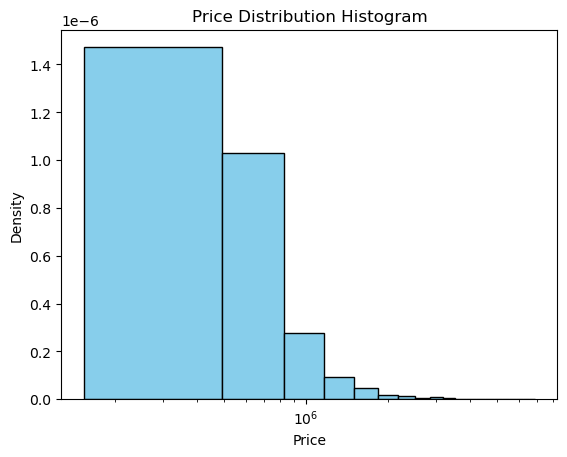

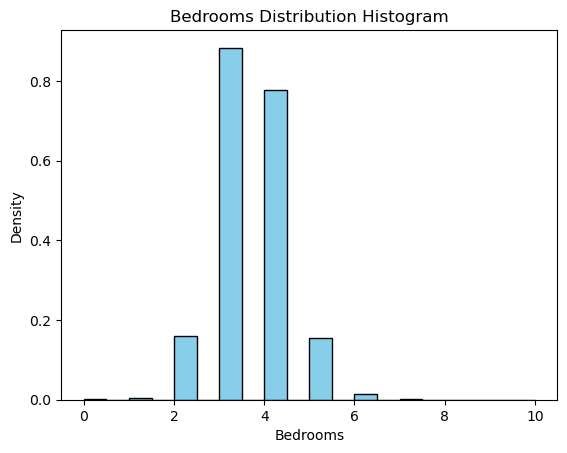

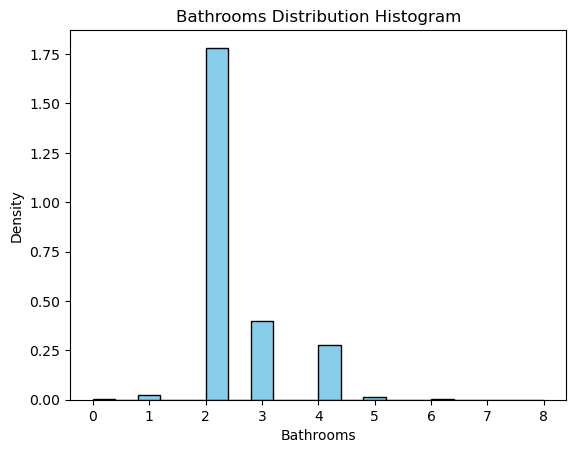

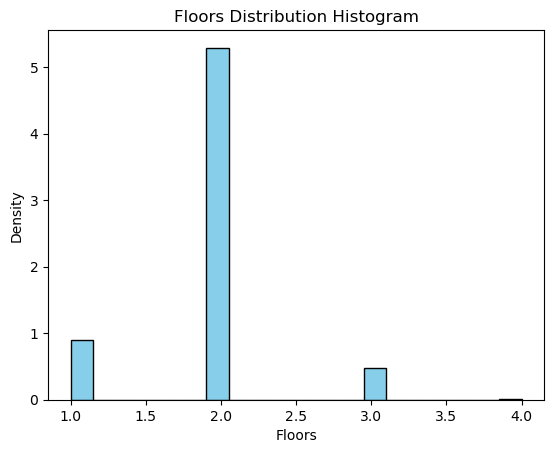

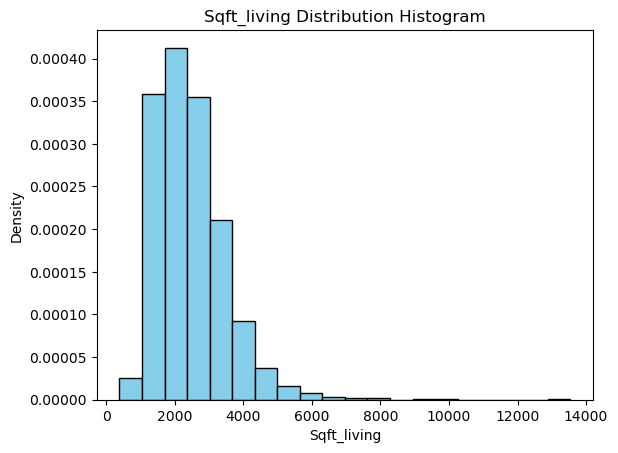

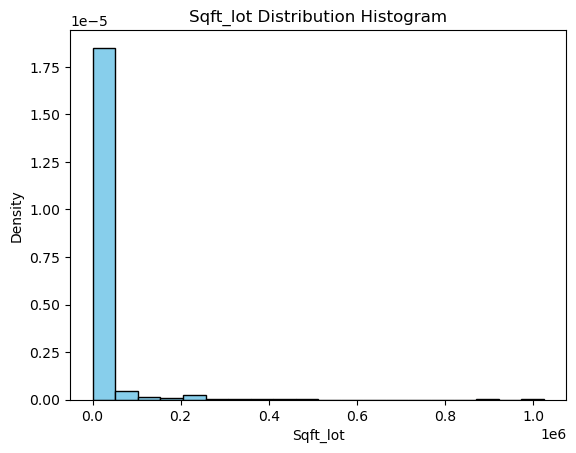

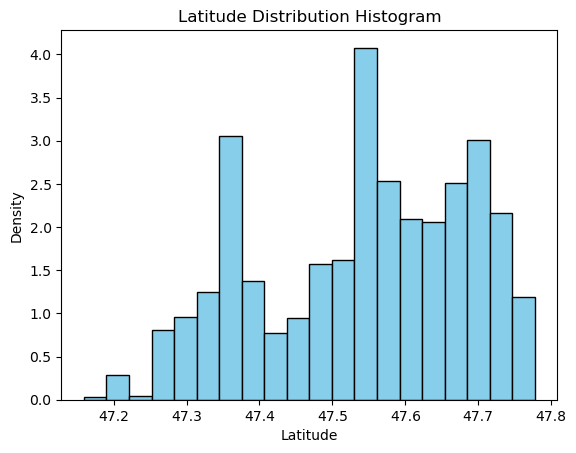

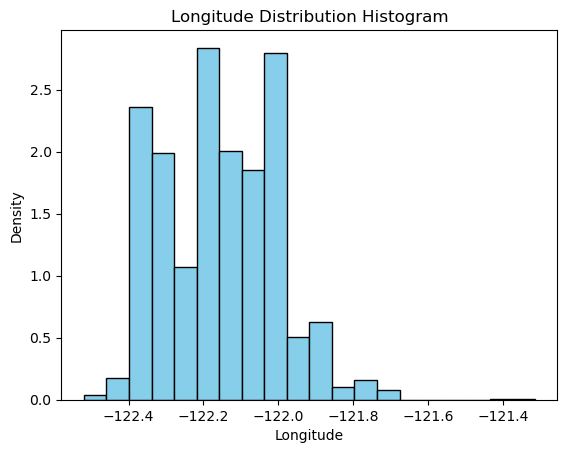

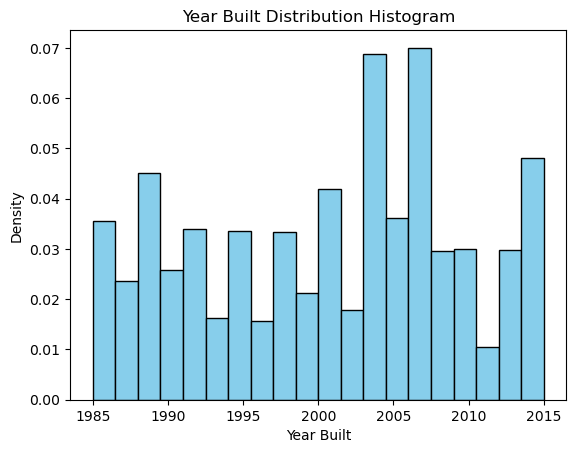

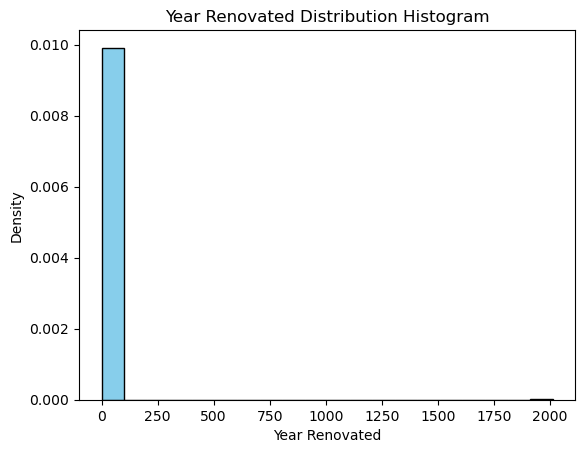

In [11]:
# plots for continous data

# histogram for price
plt.hist(housing_df['price'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xscale("log")
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution Histogram')
plt.savefig('price_distribution_histogram.png')
plt.show()

# histogram for bedroom
plt.hist(housing_df['bedrooms'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Bedrooms')
plt.ylabel('Density')
plt.title('Bedrooms Distribution Histogram')
plt.savefig('bedroom_distribution_histogram.png')
plt.show()

# histogram for bathrooms
plt.hist(housing_df['bathrooms'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Bathrooms')
plt.ylabel('Density')
plt.title('Bathrooms Distribution Histogram')
plt.savefig('bathroom_distribution_histogram.png')
plt.show()

# histogram for floors
plt.hist(housing_df['floors'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Floors')
plt.ylabel('Density')
plt.title('Floors Distribution Histogram')
plt.savefig('floors_distribution_histogram.png')
plt.show()

# histogram for sqft_living
plt.hist(housing_df['sqft_living'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Sqft_living')
plt.ylabel('Density')
plt.title('Sqft_living Distribution Histogram')
plt.savefig('sqft_living_distribution_histogram.png')
plt.show()

# histogram for sqft_lot
plt.hist(housing_df['sqft_lot'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Sqft_lot')
plt.ylabel('Density')
plt.title('Sqft_lot Distribution Histogram')
plt.savefig('sqft_lot_distribution_histogram.png')
plt.show()

# histogram for lat 
plt.hist(housing_df['lat'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.title('Latitude Distribution Histogram')
plt.savefig('latitude_distribution_histogram.png')
plt.show()

# histogram for long
plt.hist(housing_df['long'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.title('Longitude Distribution Histogram')
plt.savefig('longitude_distribution_histogram.png')
plt.show()

# histogram for year built
plt.hist(housing_df['yr_built'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Year Built')
plt.ylabel('Density')
plt.title('Year Built Distribution Histogram')
plt.savefig('year_built_distribution_histogram.png')
plt.show()

# histogram for year renovated
plt.hist(housing_df['yr_renovated'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Year Renovated')
plt.ylabel('Density')
plt.title('Year Renovated Distribution Histogram')
plt.savefig('year_renovated_distribution_histogram.png')
plt.show()

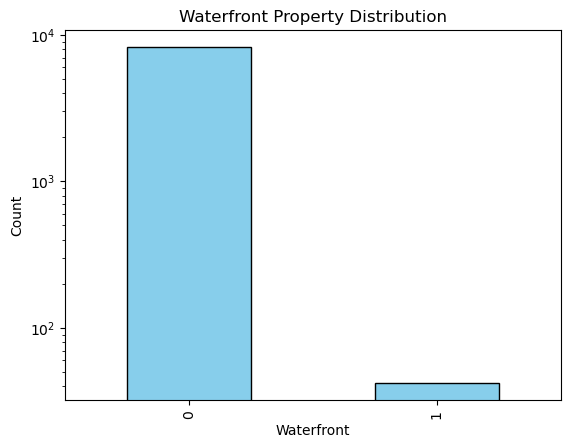

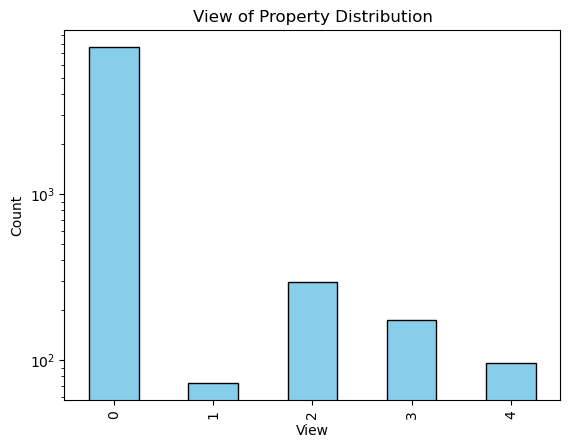

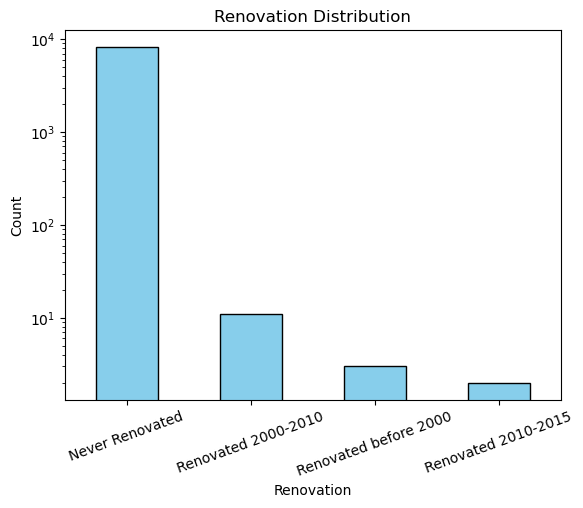

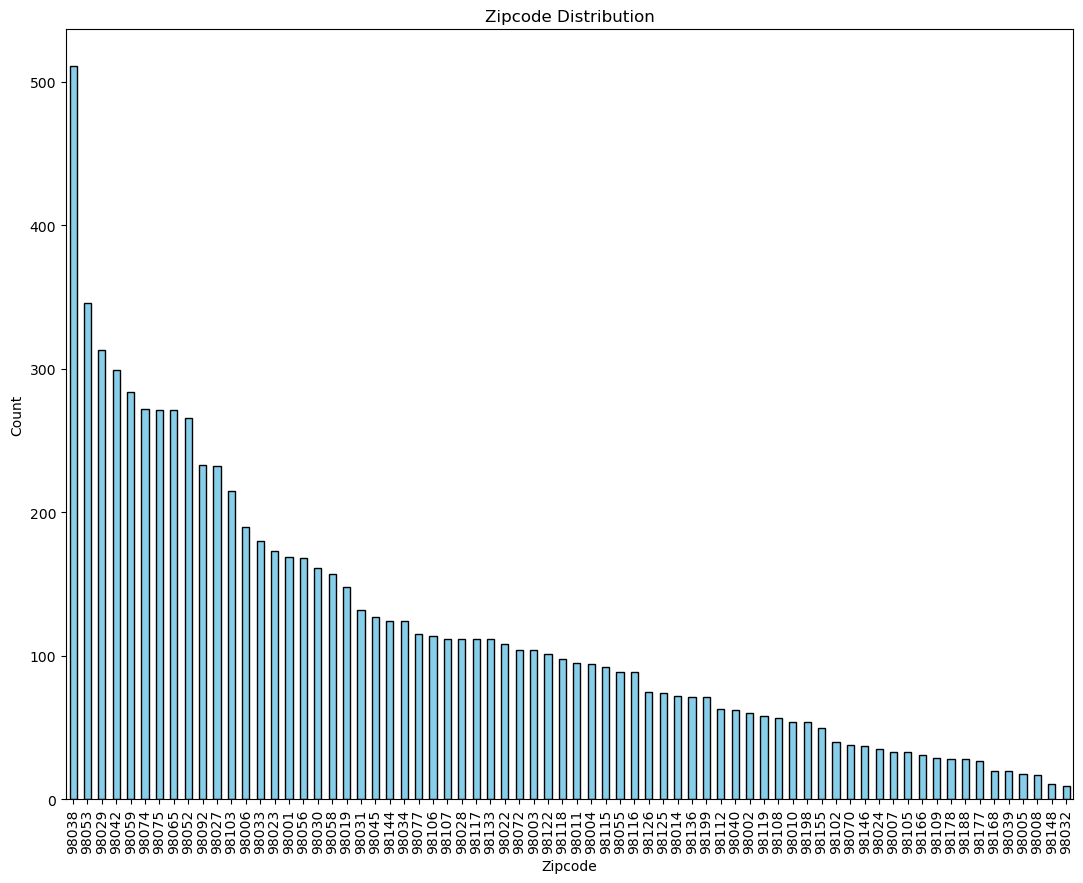

In [22]:
# plots for categorical data

# bar chart for waterfront
counts = housing_df['waterfront'].value_counts()
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.title('Waterfront Property Distribution')
plt.show()

# bar chart for view
counts = housing_df['view'].value_counts().sort_index()
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('View')
plt.ylabel('Count')
plt.title('View of Property Distribution')
plt.show()

# bar chart for renovation_category
counts = housing_df['renovation_category'].value_counts()
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xticks(rotation=20)
plt.xlabel('Renovation')
plt.ylabel('Count')
plt.title('Renovation Distribution')
plt.show()

# bar chart for zipcode counts
counts = housing_df['zipcode'].value_counts()
plt.figure(figsize=(13, 10))
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Zipcode')
plt.ylabel('Count')
plt.title('Zipcode Distribution')
plt.show()

# Bivariate EDA

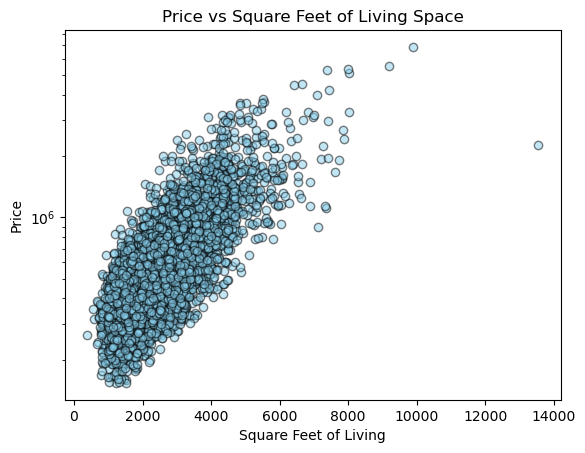

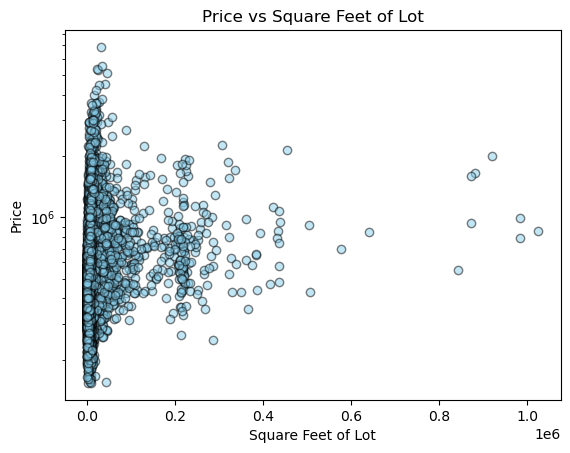

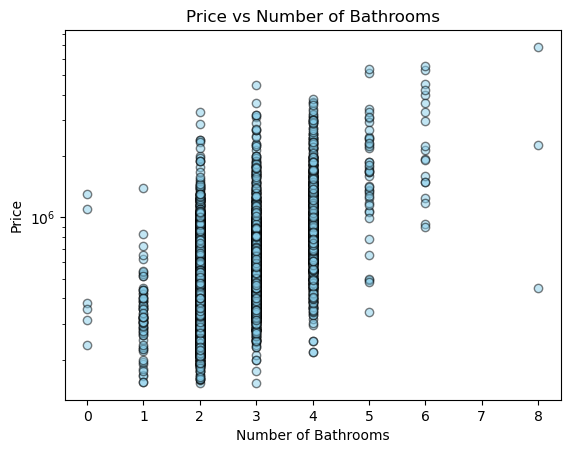

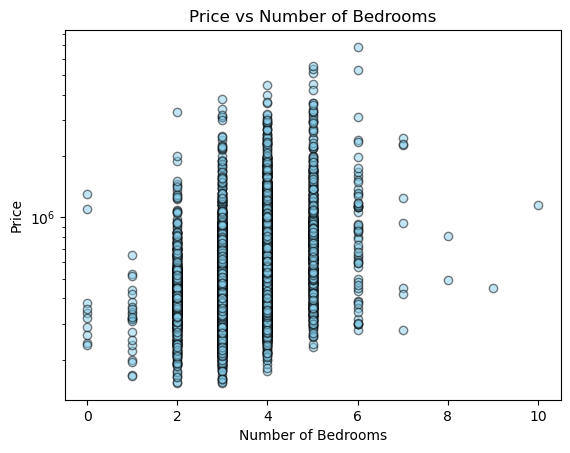

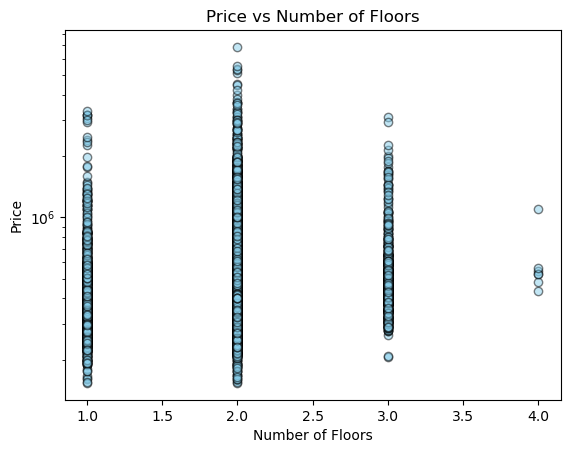

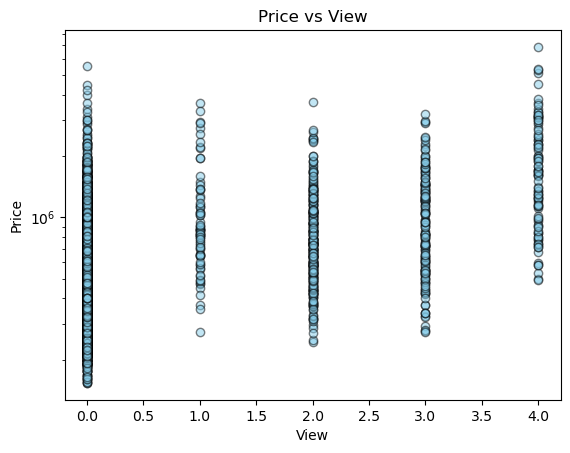

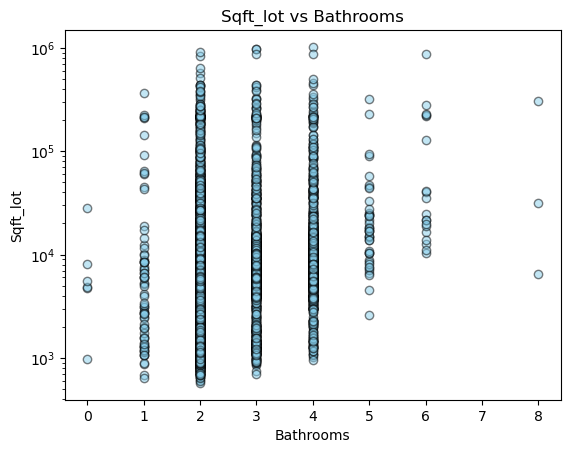

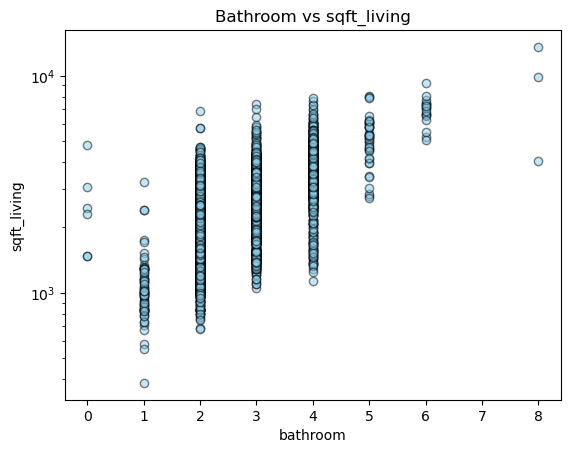

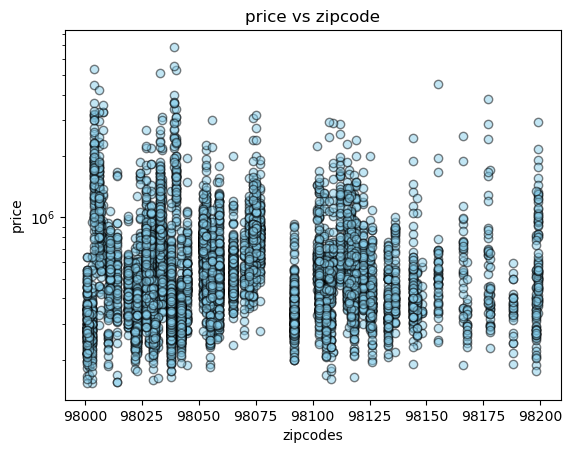

In [13]:
# Creating price vs. sqft_lot scatter plot
plt.scatter(housing_df['sqft_living'], housing_df['price'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('Square Feet of Living')
plt.ylabel('Price')
plt.title('Price vs Square Feet of Living Space')
plt.show()

# Creating price vs. sqft_lot scatter plot
plt.scatter(housing_df['sqft_lot'], housing_df['price'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('Square Feet of Lot')
plt.ylabel('Price')
plt.title('Price vs Square Feet of Lot')
plt.show()

# Creating price vs. bathroom scatter plot
plt.scatter(housing_df['bathrooms'], housing_df['price'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Number of Bathrooms')
plt.show()

# Creating price vs. sqft_lot scatter plot
plt.scatter(housing_df['bedrooms'], housing_df['price'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Number of Bedrooms')
plt.show()

# Creating price vs. sqft_lot scatter plot
plt.scatter(housing_df['floors'], housing_df['price'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.title('Price vs Number of Floors')
plt.show()

# Creating price vs. sqft_lot scatter plot
plt.scatter(housing_df['view'], housing_df['price'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Price vs View')
plt.show()

# Creating Sqft_lot vs. Bathrooms scatter plot
plt.scatter(housing_df['bathrooms'], housing_df['sqft_lot'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('Bathrooms')
plt.ylabel('Sqft_lot')
plt.title('Sqft_lot vs Bathrooms')
plt.show()


# Creating sqft_living vs.Bathrooms scatter plot
plt.scatter(housing_df['bathrooms'], housing_df['sqft_living'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('bathroom')
plt.ylabel('sqft_living')
plt.title('Bathroom vs sqft_living')
plt.show()

# Creating sqft_living vs.zipcodes scatter plot
plt.scatter(housing_df['zipcode'], housing_df['price'], alpha=0.5, color='skyblue', edgecolor='black')
plt.yscale("log")
plt.xlabel('zipcodes')
plt.ylabel('price')
plt.title('price vs zipcode')
plt.show()

# Multivariate EDA

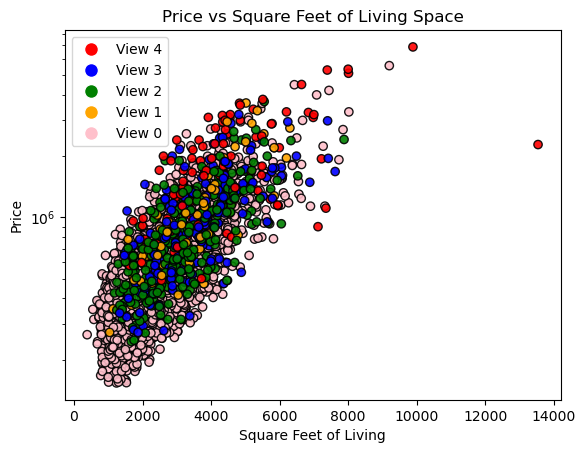

In [14]:
# price vs. sqft_lot scatter plot with third variable('view') as color 

# Define a dictionary mapping each view category to its corresponding color
view_color_map = {4: 'red', 3: 'blue', 2: 'green', 1: 'orange', 0: 'pink'}

filtered_df1 = housing_df[housing_df['view'] == 0]
filtered_df2 = housing_df[housing_df['view'] != 0]

# Create a list of colors corresponding to each view category
colors1 = [view_color_map[view] for view in filtered_df1['view']]

# Create a list of colors corresponding to each view category
colors2 = [view_color_map[view] for view in filtered_df2['view']]

# Create the scatter plot with colors based on the 'view' column and the custom colors
plt.scatter(filtered_df1['sqft_living'], filtered_df1['price'], c=colors1, alpha=0.9, edgecolor="black") 
plt.scatter(filtered_df2['sqft_living'], filtered_df2['price'], c=colors2, alpha=0.9, edgecolor="black")

# Set y-axis to a logarithmic scale if needed
plt.yscale("log")

# Add labels and title
plt.xlabel('Square Feet of Living')
plt.ylabel('Price')
plt.title('Price vs Square Feet of Living Space')

# Create legend
legend_labels = [f'View {view}' for view in view_color_map.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=view_color_map[view], markersize=10, label=label) for view, label in zip(view_color_map.keys(), legend_labels)]
plt.legend(handles=legend_handles, labels=legend_labels, loc='best')

# Show the plot
plt.show()



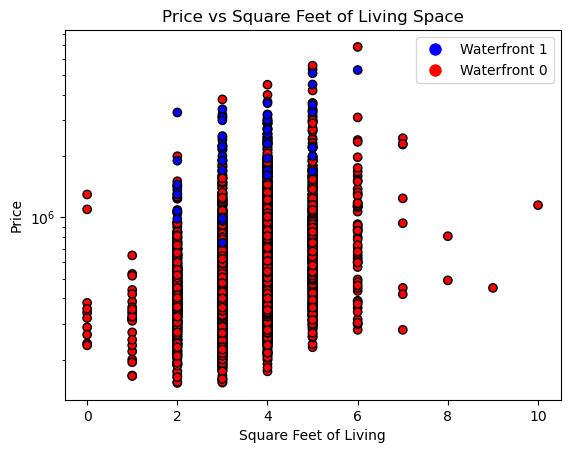

In [15]:
# price vs. bedrooms scatter plot with third variable('view') as color 

# Define a dictionary mapping each view category to its corresponding color
view_color_map = { 1: 'blue', 0: 'red'}

filtered_df1 = housing_df[housing_df['waterfront'] == 0]
filtered_df2 = housing_df[housing_df['waterfront'] != 0]

# Create a list of colors corresponding to each view category
colors1 = [view_color_map[waterfront] for waterfront in filtered_df1['waterfront']]

# Create a list of colors corresponding to each view category
colors2 = [view_color_map[waterfront] for waterfront in filtered_df2['waterfront']]

# Create the scatter plot with colors based on the 'view' column and the custom colors
plt.scatter(filtered_df1['bedrooms'], filtered_df1['price'], c=colors1, edgecolor="black") 
plt.scatter(filtered_df2['bedrooms'], filtered_df2['price'], c=colors2, edgecolor="black")

# Set y-axis to a logarithmic scale if needed
plt.yscale("log")

# Add labels and title
plt.xlabel('Square Feet of Living')
plt.ylabel('Price')
plt.title('Price vs Square Feet of Living Space')

# Create legend
legend_labels = [f'Waterfront {waterfront}' for waterfront in view_color_map.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=view_color_map[waterfront], markersize=10, label=label) for waterfront, label in zip(view_color_map.keys(), legend_labels)]
plt.legend(handles=legend_handles, labels=legend_labels, loc='best')

# Show the plot
plt.show()

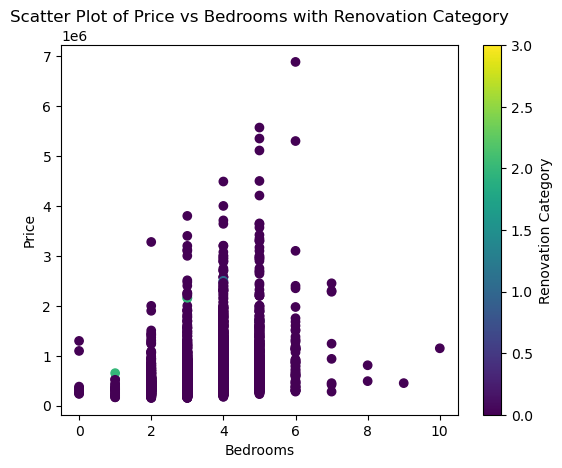

In [16]:
import matplotlib.pyplot as plt

# Define the color map for the renovation categories
color_map = {
    'Never Renovated': 0,
    'Renovated before 2000': 1,
    'Renovated 2000-2010': 2,
    'Renovated 2010-2015': 3
}

# Map the renovation categories to numerical values
housing_df['renovation_category_numeric'] = housing_df['renovation_category'].map(color_map)

# Create scatter plot
plt.scatter(housing_df['bedrooms'], housing_df['price'], c=housing_df['renovation_category_numeric'], cmap='viridis')

# Add colorbar with appropriate labels
plt.colorbar(label='Renovation Category')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Bedrooms with Renovation Category')
plt.show()


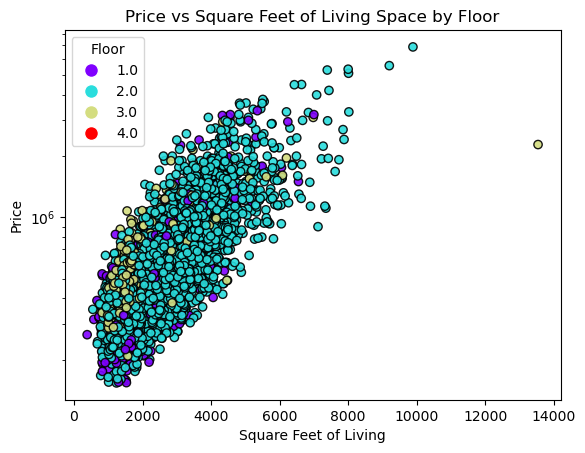

In [17]:
# Define a dictionary mapping each floor to a color
unique_floors = housing_df['floors'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_floors)))
floor_color_map = dict(zip(unique_floors, colors))

# Create a list of colors corresponding to each floor
housing_df['color'] = housing_df['floors'].map(floor_color_map)

# Create the scatter plot
plt.scatter(housing_df['sqft_living'], housing_df['price'], c=housing_df['color'], alpha=0.9, edgecolor="black")

# Set y-axis to a logarithmic scale if needed
plt.yscale("log")

# Add labels and title
plt.xlabel('Square Feet of Living')
plt.ylabel('Price')
plt.title('Price vs Square Feet of Living Space by Floor')

# Create legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=floor_color_map[floor], markersize=10, label=floor) for floor in unique_floors]
plt.legend(handles=legend_handles, title='Floor', loc='best')

# Show the plot
plt.show()

In [18]:
housing_df.to_csv('Resources/Modified_housing.csv', index=False)

In [19]:
housing_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,zipcode,lat,long,renovation_category,renovation_category_numeric,color
4,1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,1987,0,98074,47.6168,-122.045,Never Renovated,0,"[0.5, 0.0, 1.0, 1.0]"
5,7237550310,1225000.0,4,4.0,5420,101930,1.0,0,0,2001,0,98053,47.6561,-122.005,Never Renovated,0,"[0.5, 0.0, 1.0, 1.0]"
6,1321400060,257500.0,3,2.0,1715,6819,2.0,0,0,1995,0,98003,47.3097,-122.327,Never Renovated,0,"[0.16666666666666663, 0.8660254037844386, 0.86..."
9,3793500160,323000.0,3,2.0,1890,6560,2.0,0,0,2003,0,98038,47.3684,-122.031,Never Renovated,0,"[0.16666666666666663, 0.8660254037844386, 0.86..."
16,1875500060,395000.0,3,2.0,1890,14040,2.0,0,0,1994,0,98019,47.7277,-121.962,Never Renovated,0,"[0.16666666666666663, 0.8660254037844386, 0.86..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.0,1530,1131,3.0,0,0,2009,0,98103,47.6993,-122.346,Never Renovated,0,"[0.8333333333333333, 0.8660254037844387, 0.500..."
21609,6600060120,400000.0,4,2.0,2310,5813,2.0,0,0,2014,0,98146,47.5107,-122.362,Never Renovated,0,"[0.16666666666666663, 0.8660254037844386, 0.86..."
21610,1523300141,402101.0,2,1.0,1020,1350,2.0,0,0,2009,0,98144,47.5944,-122.299,Never Renovated,0,"[0.16666666666666663, 0.8660254037844386, 0.86..."
21611,291310100,400000.0,3,2.0,1600,2388,2.0,0,0,2004,0,98027,47.5345,-122.069,Never Renovated,0,"[0.16666666666666663, 0.8660254037844386, 0.86..."
